## Overview

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not.


## About Dataset

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Dataset link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud



## Methodology  - Supervised Learning
 
A wide number of ML techniques can be used to address the problem of CCFD. This is directly reflected by the huge amount of published papers on the topic in the last decade. Despite this large volume of research work, most of the proposed approaches follow a common baseline ML methodology 

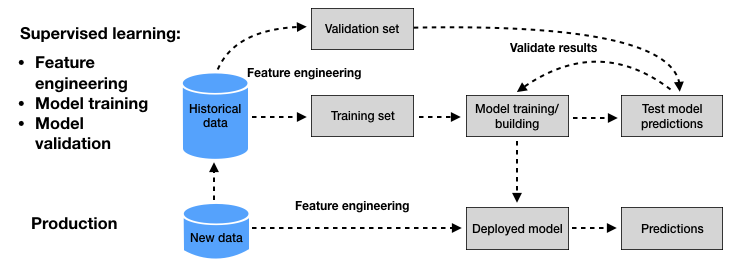

In credit card fraud detection, data typically consists of transaction data, collected for example by a payment processor or a bank. 


The supervised learning procedure typically consists of training a set of prediction models and estimating their performances using the validation set. At the end of the procedure, the model that is assumed to provide the best performance (that is, the lowest loss on the validation set) is selected, and used for providing predictions on new transactions.

a. A wide range of methods exists for designing and training supervised prediction models for CCFD are 

1. Support Vector Machine
2. Bayesian Network Classifier
3. Decision Tree classifier
4. Logistic Regression
5. K Nearest Neighbour

b. For Unsupervised prediction models, the widely using algorithms are 

1. K mean clustering

 For anamoly detection can also use 

2. Isolation Forest 
3. Local Outlier Factor (LOF)

c. In Ensembling learning , we can use 

1. Random Forest
2. Bagging
3. Boosting


In this Project, i've used Logistic Regression, XGBoost Classifier, Isolation Forest and Local Outlier Factor Algorithms and compared which model performed well, when the target data is seen and evaluated how well the unsupervised learning algorithms performed on unseen data.

## Importing Packages

In [169]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, accuracy_score

## Loading and Reading the Dataset

In [170]:
credit_card_data = pd.read_csv('./creditcard.csv')

In [171]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


From the class variables, the value of 1 is fraud and value of 0 is a non fraudlent transaction

In [172]:
credit_card_data.shape

(284807, 31)

In [173]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [174]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [175]:
credit_card_data.isnull().sum().any()

False

## Statistical Analysis

In [176]:
#among 284807 transaction, there are 492 fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

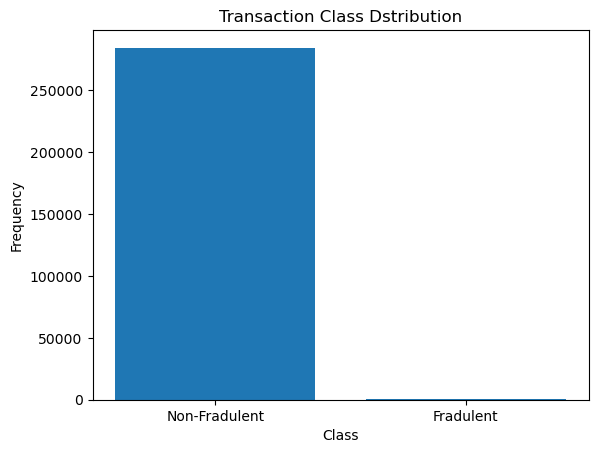

In [177]:
class_total = credit_card_data['Class'].value_counts()
classes = ['Non-Fradulent','Fradulent']

plt.title("Transaction Class Dstribution")
plt.bar(class_total.index , class_total)
plt.xlabel('Class')
plt.xticks(range(len(class_total)),classes)
plt.ylabel('Frequency')
plt.show()


In [178]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [179]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [180]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [181]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [182]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


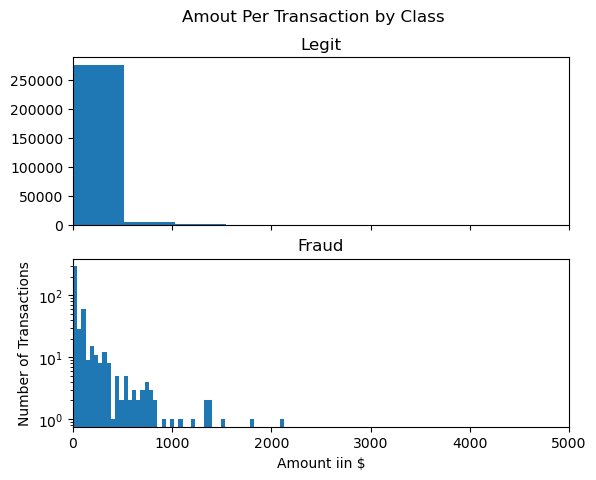

In [183]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amout Per Transaction by Class')
bins=50
ax1.hist(legit.Amount, bins=bins)
ax1.set_title('Legit')
ax2.hist(fraud.Amount,bins=bins)
ax2.set_title('Fraud')
plt.xlabel('Amount iin $')
plt.ylabel('Number of Transactions')
plt.xlim((0,5000))
plt.yscale('log')
plt.show()


In [184]:
# since we have more data, we taking sample of data randomly

data1= credit_card_data.sample(frac = 0.1,random_state=1)

data1.shape

(28481, 31)

In [185]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


## Splitting the Dataset

In [186]:
X = data1.drop(columns='Class',axis=1)
y = data1['Class']

In [187]:
X.shape

(28481, 30)

In [188]:
y.shape

(28481,)

## Split the data into Training data & Testing Data

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

## SUPERVISED LEARNING

### Model Training On Logistic Regression

### Hyper Parameter Tuning

In [190]:
#intiating the model
lr_model = LogisticRegression()

In [191]:
from sklearn.model_selection import RandomizedSearchCV


random_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [192]:
# Perform random search with cross-validation

random_estimator = RandomizedSearchCV(estimator = lr_model,
                                   param_distributions = random_grid,
                                   n_iter = 10,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   verbose = 1, 
                                   cv =5
                                  )



In [193]:
best_clf = random_estimator.fit(X, y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [194]:
best_clf.best_estimator_

LogisticRegression(C=78.47599703514607, penalty='l1', solver='liblinear')

In [161]:
best_clf.score(X,y)

0.9989115550718023

In [195]:
 # after finding the hyperparameters
lr = LogisticRegression(C=78.47599703514607, penalty='l1', solver='liblinear')


In [196]:
lr.fit(X_train,y_train)

LogisticRegression(C=78.47599703514607, penalty='l1', solver='liblinear')

## Model Evaluation

In [246]:
# accuracy on training data
X_train_prediction = lr.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction, y_train)

In [247]:
train_accuracy

0.9988588483146067

In [248]:
# accuracy on test data
X_test_prediction = lr.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, y_test)

In [249]:
test_accuracy

0.9992978760751272

In [250]:
from sklearn.metrics import confusion_matrix

confusion_matrix(X_test_prediction, y_test)

array([[5687,    4],
       [   0,    6]], dtype=int64)

After Hyperparameter tuning in Logistic Regression, we achieved an training accuracy of 99% and testing accuracy of 99%. This shows  model has learned the patterns in the training data well and is generalizing effectively to unseen data. 

## ENSEMBLE METHOD

## Model Training on XGBoost

In [205]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)


In [222]:
import xgboost as xgb


# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

In [213]:
from scipy.stats import uniform, randint


# Define the hyperparameter grid
params = {

'learning_rate' : [0.05,0.10,0.15,0.20,0.25],
'max_depth' : [ 3,4,5,6,8],
'min_child_weight': [ 1,3,5,7],
'gamma':[0.0,0.1,0.2,0.3],
'colsample_bytree':[0.3,0.4,0.5,0.7]
}



In [214]:
# Perform random search CV
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=params,
    n_iter=10,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    random_state=42
)

In [215]:
random_search.fit(X,y)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 6, 8],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=42, scoring='accuracy')

In [216]:
#best parameter
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [217]:
random_search.best_score_

0.9993680083446245

In [226]:
#after finding the parameters, now fititting the model

xgb_model = xgb.XGBClassifier(min_child_weight= 1,
                     max_depth= 3,
                     learning_rate= 0.2,
                     gamma= 0.0,
                     colsample_bytree= 0.5)

In [227]:
xgb_model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [228]:
# accuracy on training data
X_train_prediction = xgb_model.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction, y_train)

In [230]:
train_accuracy

1.0

In [231]:
# accuracy on testing data
X_test_prediction = xgb_model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, y_test)

In [232]:
test_accuracy

1.0

In [244]:
from sklearn.metrics import confusion_matrix

confusion_matrix(X_test_prediction, y_test)


array([[5687,    0],
       [   0,   10]], dtype=int64)

After Hyperparameter tuning in XGBoost Classifier, we achieved an training accuracy of 1% and testing accuracy of 1%. This shows  model has learned the patterns in the training data well and is generalizing effectively to unseen data. 

# UNSUPERVISED LEARNING

### Isolation Forest Algorithm :
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

### Local Outlier Factor(LOF) Algorithm
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [262]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=42, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
   
}

In [263]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))

E:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



### Observations :

1. Isolation Forest detected 73 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 8516 errors
2. Isolation Forest has a 99.74% more accurate than LOF of 99.65% and SVM of 70.09
3. While comparing all 5 models, in supervised learning and ensembelling, Xgboost and Logistic Regression both peformed better but XGBoost achieved highest accuracy, whereas in unsupervised learning the Isolaton forest performed much better in determining the fraud cases.

